In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("part2.csv", encoding='cp1252')
df.head()


,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,"4,462","1,309","2,293","1,116","3,409",40
1,Baskin-Robbins,686,296,"2,317",0,"2,317",102
2,Bojangles,"1,485","1,924",496,277,773,15
3,Burger King,"10,033","1,470","7,054",51,"7,105",24
4,Carl’s Jr.,"1,560","1,400","1,011",47,"1,058",-21


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Fast-Food Chains                                  50 non-null     object
 1   U.S. Systemwide Sales (Millions - U.S Dollars)    50 non-null     object
 2   Average Sales per Unit (Thousands - U.S Dollars)  50 non-null     object
 3   Franchised Stores                                 50 non-null     object
 4   Company Stores                                    50 non-null     object
 5   2021 Total Units                                  50 non-null     object
 6   Total Change in Units from 2020                   50 non-null     object
dtypes: object(7)
memory usage: 2.9+ KB


In [126]:
print(df.columns.tolist())

['Fast-Food Chains', 'U.S. Systemwide Sales (Millions - U.S Dollars)', 'Average Sales per Unit (Thousands - U.S Dollars)', 'Franchised Stores', 'Company Stores', '2021 Total Units', 'Total Change in Units from 2020']


In [128]:
cols = ["U.S. Systemwide Sales (Millions - U.S Dollars)", "Average Sales per Unit (Thousands - U.S Dollars)", "2021 Total Units", "Franchised Stores", "Company Stores", "Total Change in Units from 2020"]
for col in cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce').fillna(0)

#### 1. Bar chart - Top 10 Fast-Food Chains by U.S.Systemwide Sales (2021)

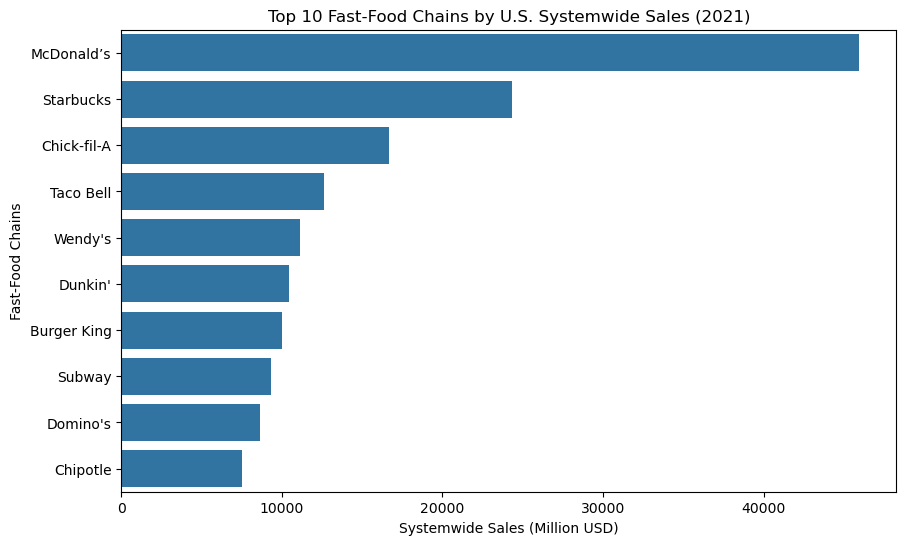

In [130]:
top10_sales = df.sort_values("U.S. Systemwide Sales (Millions - U.S Dollars)", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_sales,
    y="Fast-Food Chains",
    x="U.S. Systemwide Sales (Millions - U.S Dollars)"
)

plt.title("Top 10 Fast-Food Chains by U.S. Systemwide Sales (2021)")
plt.xlabel("Systemwide Sales (Million USD)")
plt.ylabel("Fast-Food Chains")
plt.show()


**Nhận xét:** Biểu đồ cho thấy top 10 chuỗi Fast-Food lớn nhất tại Mỹ năm 2001, trong đó: 
* McDonald’s dẫn đầu tuyệt đối với doanh thu đạt 45,939 triệu USD, cao gấp gần 2 laanfso với đối thủ thứ hai là Starbucks (24,300 triệu USD) và gấp gần 3 lần so với thứ ba là Chick-fil-A (16,700 triệu USD). Nhóm từ hạng 4 đến hạng 10 có sự cạnh tranh gắt gao trong khoảng từ 7,700 đến 12,600 triệu USD.
* McDonald's không chỉ bán đồ ăn nhanh mà đang bán một "hệ thống vận hành" chặt chẽ, không chỉ tập trung vào mở rộng số lượng cửa hàng mà còn đảm bảo chuẩn hóa từng bước trong quá trình vận hành, giúp họ duy trì vị thế độc tôn mà chưa đối thủ nào chạm tới được.
* Starbucks và Chick-fil-A cho thấy xu hướng tiêu dùng đang dịch chuyển: khách hàng sẵn sàng chi mạnh tay cho các sản phẩm chuyên biệt (cà phê, gà rán) thay vì chỉ trung thành với Burger truyền thống.

#### 2. Scatter plot - Total Units and Systemwide Sales

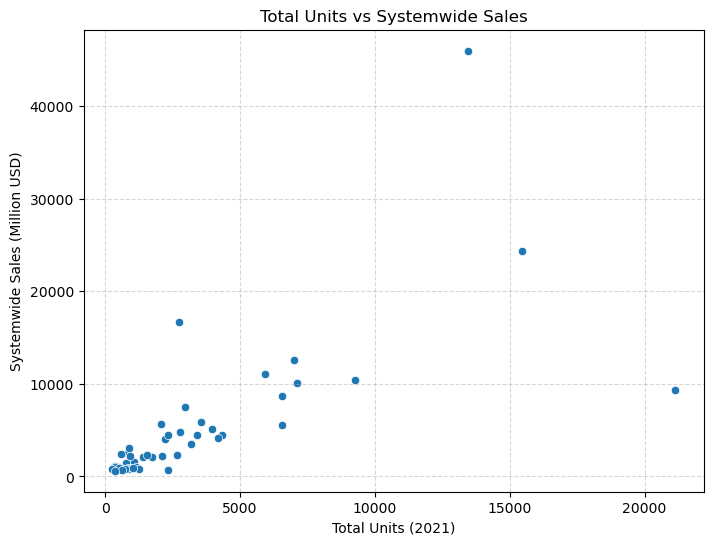

In [132]:
plt.figure(figsize=(8,6))
plt.grid(True, linestyle='--', alpha=0.5)
sns.scatterplot(
    data=df,
    x="2021 Total Units",
    y="U.S. Systemwide Sales (Millions - U.S Dollars)"
)

plt.title("Total Units vs Systemwide Sales")
plt.xlabel("Total Units (2021)")
plt.ylabel("Systemwide Sales (Million USD)")
plt.show()


**Nhận xét:** Biểu đồ cho thấy tổng doanh thu và quy mô của các chuỗi Fast-Food tại Mỹ năm 2001, trong đó: 
* Subway là chuỗi có số lượng cửa hàng lớn nhất với 21,147 đơn vị, theo sau là Starbucks (15,450) và McDonald's (13,438). Chick-fil-A dù đứng thứ 3 về doanh thu nhưng lại có số lượng cửa hàng ít chỉ 2,732 đơn vị, ít hơn nhiều chuỗi fast-food khác ( ví dụ: Burger King: 7,105 đơn vị, doanh thu 10,0333 triệu USD; hoặc Dominio's: 6,560 đơn vị, doanh thu chỉ 8,641 triệu USD).
* Số lượng cửa hàng không tỷ lệ thuận với doanh thu. Subway có độ phủ dày đặc nhất nhưng doanh thu tổng chỉ đứng thứ 8, cho thấy chiến lược bành trướng số lượng của họ không mang lại hiệu quả tài chính tương xứng với quy mô.
* Doanh nghiệp nên ưu tiên tối ưu hóa hiệu quả từng điểm bán trước khi quyết định mở rộng ồ ạt để tránh gánh nặng chi phí vận hành.

#### 3. Scatter plot - Total Units and Average Sales per Unit

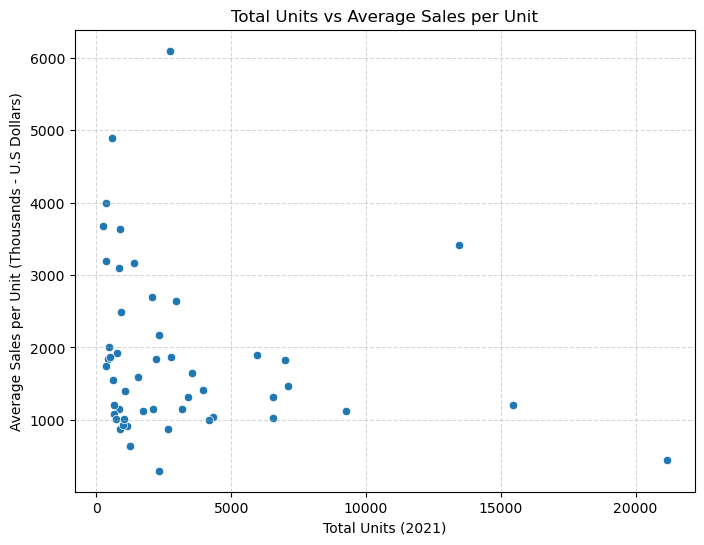

In [135]:
plt.figure(figsize=(8,6))
plt.grid(True, linestyle='--', alpha=0.5)
sns.scatterplot(
    data=df,
    x="2021 Total Units",
    y="Average Sales per Unit (Thousands - U.S Dollars)"
)

plt.title("Total Units vs Average Sales per Unit")
plt.xlabel("Total Units (2021)")
plt.ylabel("Average Sales per Unit (Thousands - U.S Dollars)")
plt.show()


**Nhận xét:** Biểu đồ cho thấy hiệu suất cửa hàng của các chuỗi Fast-Food tại Mỹ năm 2001, trong đó: 
* Chick-fil-A đạt hiệu suất kinh doanh đáng kinh ngạc với mức trung bình 6,120 nghìn USD/cửa hàng, cao nhất toàn hệ thống. McDonald's đứng thứ hai với 3,423 nghìn USD/cửa hàng. Subway thấp nhất trong nhóm lớn với chỉ 442 nghìn USD/cửa hàng.
* Chick-fil-A mới thực sự là "vua" về mặt hiệu quả kinh doanh. Dù quy mô nhỏ, sức mạnh thương hiệu và mô hình vận hành của họ giúp mỗi cửa hàng tạo ra giá trị gấp 14 lần so với một cửa hàng Subway.
* Tập trung vào giá trị đơn hàng trung bình, lòng trung thành của khách hàng, và chất lượng dịch vụ tại mỗi điểm bán sẽ bền vững hơn là chạy đua số lượng.

#### 4. Stacked bar - Franchise and Company Stores of Top 10 Fast-Food Chains

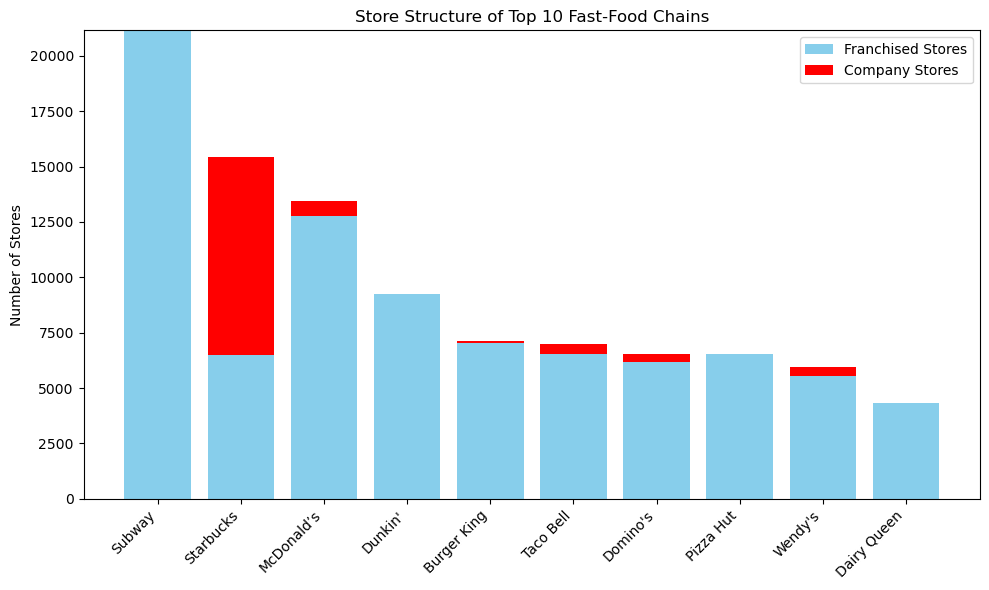

In [146]:
top10_units = df.sort_values("2021 Total Units", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(
    top10_units["Fast-Food Chains"],
    top10_units["Franchised Stores"],
    label="Franchised Stores",
    color = "skyblue"
)

plt.bar(
    top10_units["Fast-Food Chains"],
    top10_units["Company Stores"],
    bottom=top10_units["Franchised Stores"],
    label="Company Stores",
    color = "red"
)

plt.xticks(rotation=45, ha="right")
plt.title("Store Structure of Top 10 Fast-Food Chains")
plt.ylabel("Number of Stores")
plt.legend()
plt.tight_layout()
plt.show()


**Nhận xét:** 
Biểu đồ cho thấy cơ cấu sở hữu các cửa hàng chuyển nhượng và các cửa hàng của công ty của các chuỗi Fast-Food tại Mỹ năm 2001, trong đó:
- Hầu hết các chuỗi như Subway, Dunkin', Burger King, Pizza Hut, và Dairy Queen vận hành theo mô hình nhượng quyền gần như 100%. Ngược lại, Chipotle hay In-N-Out Burger sở hữu hoàn toàn 100% cửa hàng của mình (2,966 đơn vị và 370 đơn vị). Starbucks giữ tỷ lệ cân bằng hơn với khoảng 58% cửa hàng do công ty quản lý.
- Nhượng quyền giúp doanh nghiệp mở rộng quy mô nhanh chóng mà không tốn nhiều vốn đầu tư trực tiếp. Tuy nhiên, mô hình sở hữu trực tiếp của Chipotle hay In-N-Out giúp họ kiểm soát tuyệt đối chất lượng sản phẩm và dịch vụ, điều này có thể là lý do giúp họ giữ được mức doanh thu ổn định dù số lượng cửa hàng không quá lớn.
- Các chuỗi muốn giữ hình ảnh thương hiệu cao cấp nên cân duy trì một tỷ lệ cửa hàng tự vận hành ( Company stores) nhất định để làm quy chuẩn chất lượng cho hệ thống các của hàng chuyển nhượng ( Franchise stores ).

#### 5. Heatmap - Overview of Key Matrics

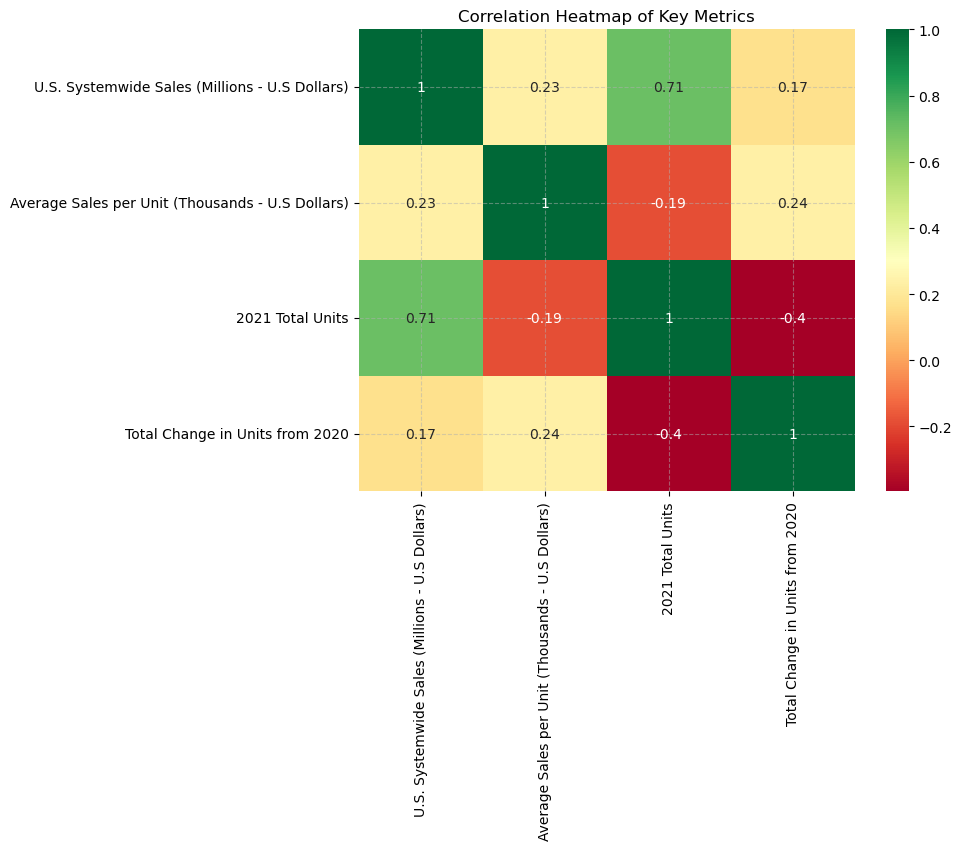

In [184]:
features = df[[
    "U.S. Systemwide Sales (Millions - U.S Dollars)",
    "Average Sales per Unit (Thousands - U.S Dollars)",
    "2021 Total Units",
    "Total Change in Units from 2020"
]]

plt.figure(figsize=(8,6))
plt.grid(True, linestyle='--', alpha=0.5)
sns.heatmap(
    features.corr(),
    annot=True,
    cmap="RdYlGn"
)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()


**Nhận xét:** Biểu đồ heatmap thể hiện mối tương quan giữa các chỉ số chính trong ngành fast-food tại Mỹ năm 2001, trong đó:
* Tương quan thuận mạnh (0.71): Tổng doanh thu hệ thống ( U.S.Systemwide Sales) có mối liên hệ chặt chẽ với Tổng số lượng cửa hàng ( Total Units). => Doanh thu của các chuỗi fast-food chủ yếu được thúc đẩy bởi mở rộng quy mô số lượng cửa hàng.
* Tương quan nghịch mức trung bình (-0.4): Mức thay đổi số lượng cửa hàng (Total Change in Units) có tương quan âm với Tổng số lượng cửa hàng ( Total Units). => Các chuỗi càng lớn thì tốc độ mở mới cửa hàng càng chậm, thậm chí một số chuỗi đã bắt đầu thu hẹp quy mô do thị trường bão hòa.
* Tương quan yếu (0.23): Tổng doanh thu hệ thống ( U.S.Systemwide Sales) có mối liên hệ yếu với Doanh thu trung bình trên mỗi cửa hàng (Average Sales per Unit). => Doanh thu cao ở toàn hệ thống không đồng nghĩa với việc doanh thu cao tại từng cửa hàng.


**Kết luận:**
* Đối với các chuỗi lớn: Chiến lược tăng trưởng nên chuyển sang nâng cao hiệu suất cửa hàng hiện hữu thông qua tối ưu menu, cải thiện trải nghiệm khách hàng và đẩy mạnh kênh số.
* Đối với nhà đầu tư: Các chuỗi vừa có tăng trưởng số lượng cửa hàng dương, vừa sở hữu doanh thu trung bình trên mỗi cửa hàng cao là các chuỗi tiềm năng để đầu tư dài hạn. 